<a href="https://colab.research.google.com/github/NatSama2/Bootcamp-Analisis-de-Datos/blob/main/Modulo-5/Clase_Correlacion_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Clase Completa: Correlación y su Aplicación con Python

Esta clase cubre los fundamentos teóricos y prácticos de la correlación en análisis de datos. Aprenderás a:
- Entender qué es la correlación y cuándo se usa
- Aplicar diferentes tipos de correlación
- Calcular y visualizar correlaciones con Pandas y Seaborn
- Interpretar correctamente los resultados

---

## ✅ ¿Qué es la correlación?

La **correlación** es una medida estadística que indica:
- **Dirección** de la relación entre dos variables (positiva o negativa)
- **Fuerza** de la relación

---

## 📏 Escala de correlación

| Valor de r | Interpretación                      |
|------------|-------------------------------------|
| +1         | Correlación positiva perfecta       |
| +0.7 a +0.9| Fuerte correlación positiva         |
| +0.3 a +0.6| Correlación positiva moderada       |
| 0          | Sin correlación                     |
| -0.3 a -0.6| Correlación negativa moderada       |
| -0.7 a -0.9| Fuerte correlación negativa         |
| -1         | Correlación negativa perfecta       |

---

## 📊 Tipos de correlación

| Tipo      | ¿Qué mide?                                       | ¿Cuándo usarlo?                                 |
|-----------|--------------------------------------------------|--------------------------------------------------|
| Pearson   | Relación lineal                                  | Datos numéricos, distribución normal             |
| Spearman  | Relación monotónica (por rangos)                 | Datos ordinales o no lineales                    |
| Kendall   | Relación por concordancia entre pares ordenados  | Muestras pequeñas o con muchos empates           |


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

---

## 📁 Dataset de ejemplo: Tips
Contiene información sobre cuentas y propinas en un restaurante.

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
## 🔍 Cálculo de correlación con `.corr()` (Pearson por defecto)

In [ ]:
cor_pearson = tips.select_dtypes(include=np.number).corr(method)
cor_pearson

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [ ]:

# Generar datos de ejemplo
data = {
    'Edad': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Ingresos': [40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000],
    'Horas_TV': [4, 3, 3, 2, 4, 5, 3, 6, 5, 7],
    'Rendimiento': [85, 90, 88, 92, 78, 75, 80, 70, 65, 60]
}
df = pd.DataFrame(data)
df


,Edad,Ingresos,Horas_TV,Rendimiento
0,25,40000,4,85
1,30,45000,3,90
2,35,50000,3,88
3,40,55000,2,92
4,45,60000,4,78
5,50,65000,5,75
6,55,70000,3,80
7,60,75000,6,70
8,65,80000,5,65
9,70,85000,7,60


Matriz de correlación:
                 Edad  Ingresos  Horas_TV  Rendimiento
Edad         1.000000  1.000000  0.710669    -0.895231
Ingresos     1.000000  1.000000  0.710669    -0.895231
Horas_TV     0.710669  0.710669  1.000000    -0.916797
Rendimiento -0.895231 -0.895231 -0.916797     1.000000


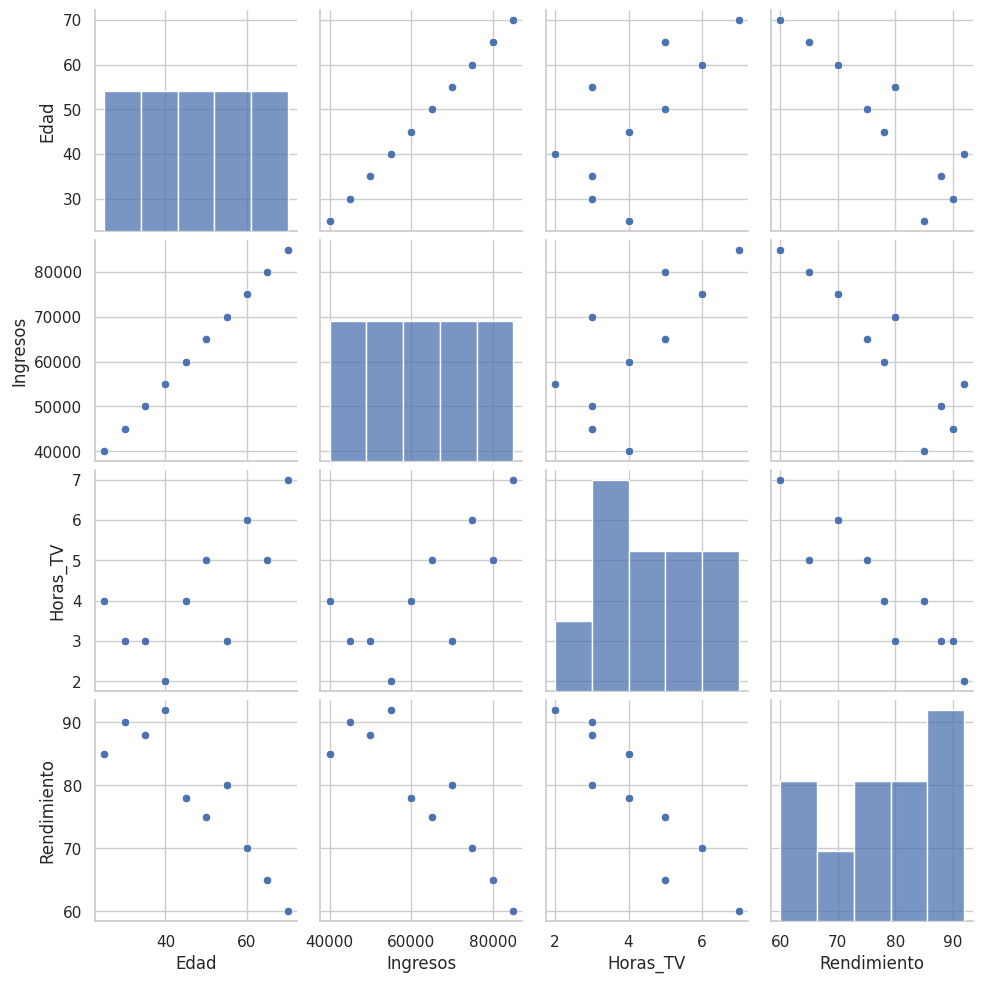

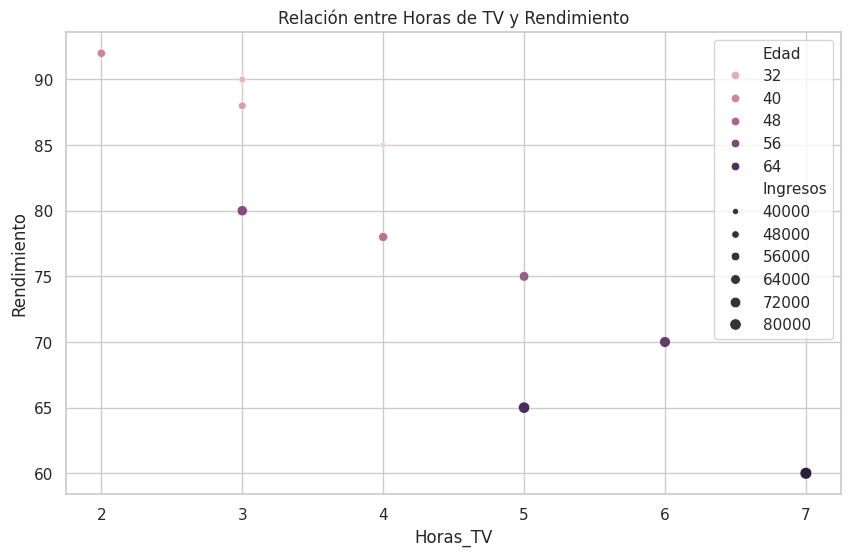

In [ ]:

# 2. Correlación entre Variables + 4. Diagramas de Dispersión
# python
# Ejercicio: Calcula correlaciones y visualiza relaciones
correlation_matrix = df.corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Diagramas de dispersión
sns.pairplot(df)
plt.show()

# Scatterplot personalizado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Horas_TV', y='Rendimiento', hue='Edad', size='Ingresos')
plt.title('Relación entre Horas de TV y Rendimiento')
plt.show()


Correlación helados-sombrillas: 0.98


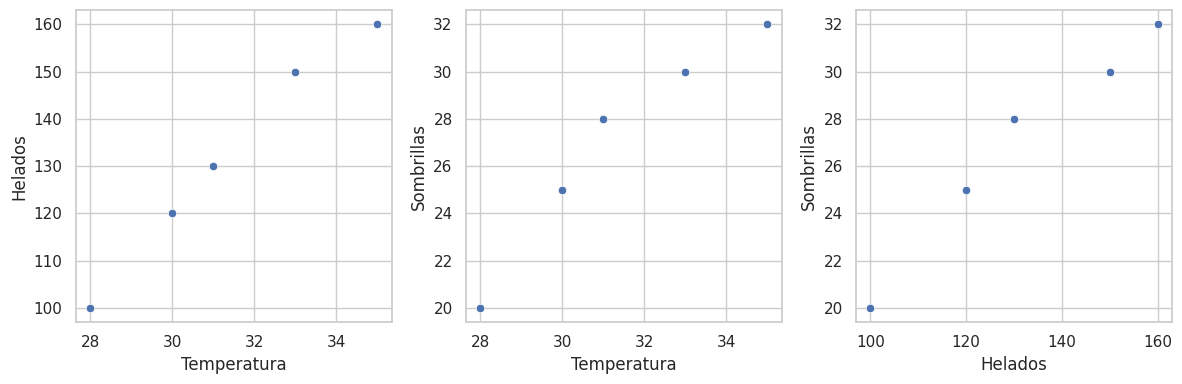

In [ ]:

# 3. Diferencia entre Correlación y Causalidad (Concepto)
# python
# Ejercicio conceptual: Analiza esta relación
helados_sombrillas = pd.DataFrame({
    'Helados': [100, 120, 150, 130, 160],
    'Sombrillas': [20, 25, 30, 28, 32],
    'Temperatura': [28, 30, 33, 31, 35]
})

correlacion = helados_sombrillas[['Helados', 'Sombrillas']].corr().iloc[0,1]
print(f"\nCorrelación helados-sombrillas: {correlacion:.2f}")

# Verifica la verdadera causa
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(x='Temperatura', y='Helados', data=helados_sombrillas)
plt.subplot(132)
sns.scatterplot(x='Temperatura', y='Sombrillas', data=helados_sombrillas)
plt.subplot(133)
sns.scatterplot(x='Helados', y='Sombrillas', data=helados_sombrillas)
plt.tight_layout()
plt.show()


Tabla de contingencia:
Nivel_Rendimiento  Bajo  Medio  Alto  All
Categoria_Edad                           
Joven                 0      1     3    4
Medio                 1      3     0    4
Mayor                 2      0     0    2
All                   3      4     3   10


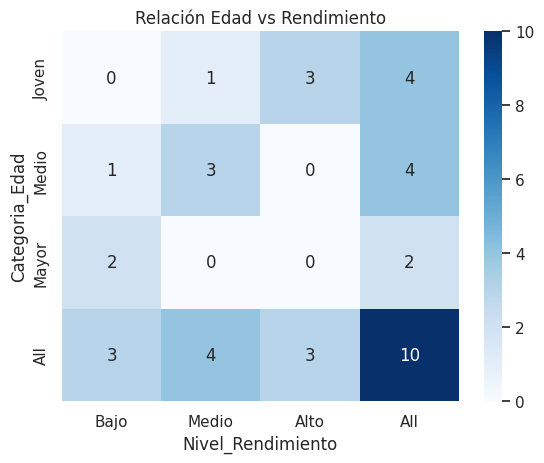

In [ ]:
# 5. Tablas de Contingencia
# python
# Crear variables categóricas
df['Categoria_Edad'] = pd.cut(df['Edad'], bins=[20, 40, 60, 80], labels=['Joven', 'Medio', 'Mayor'])
df['Nivel_Rendimiento'] = pd.cut(df['Rendimiento'], bins=[0, 70, 85, 100], labels=['Bajo', 'Medio', 'Alto'])

# Ejercicio: Crea tabla de contingencia
contingency_table = pd.crosstab(
    index=df['Categoria_Edad'],
    columns=df['Nivel_Rendimiento'],
    margins=True
)
print("\nTabla de contingencia:")
print(contingency_table)

# Visualización
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Relación Edad vs Rendimiento')
plt.show()

In [ ]:

# 6. Coeficiente de Correlación de Pearson
# python
from scipy.stats import pearsonr

# Ejercicio: Calcula correlaciones específicas
def calcular_pearson(var1, var2):
    corr, p_value = pearsonr(df[var1], df[var2])
    print(f"\nCorrelación {var1}-{var2}:")
    print(f"Coeficiente: {corr:.2f}")
    print(f"Valor p: {p_value:.4f}")
    return corr

calcular_pearson('Horas_TV', 'Rendimiento')  # Correlación negativa
calcular_pearson('Edad', 'Ingresos')          # Correlación positiva



Correlación Horas_TV-Rendimiento:
Coeficiente: -0.92
Valor p: 0.0002

Correlación Edad-Ingresos:
Coeficiente: 1.00
Valor p: 0.0000


np.float64(0.9999999999999997)

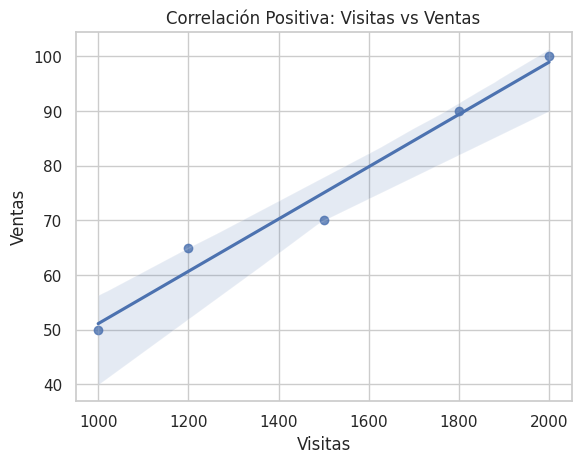


Correlación visitas-ventas: 0.99 (Positiva)


In [ ]:
# 7. Ejemplo Correlación Positiva
# python
# Datos de ventas online
ventas_data = {
    'Visitas': [1000, 1200, 1500, 1800, 2000],
    'Ventas': [50, 65, 70, 90, 100]
}
ventas_df = pd.DataFrame(ventas_data)

# Ejercicio: Visualiza y calcula
sns.regplot(x='Visitas', y='Ventas', data=ventas_df)
plt.title('Correlación Positiva: Visitas vs Ventas')
plt.show()

r, _ = pearsonr(ventas_df['Visitas'], ventas_df['Ventas'])
print(f"\nCorrelación visitas-ventas: {r:.2f} (Positiva)")


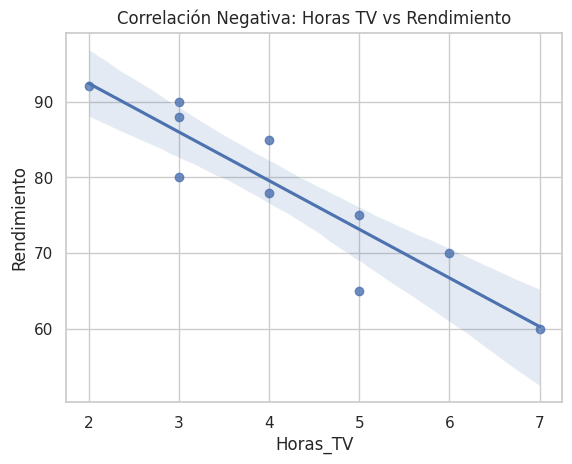


Correlación horas TV-rendimiento: -0.92 (Negativa)


In [ ]:
# 8. Ejemplo Correlación Negativa
# python
# Ejercicio con datos existentes
sns.regplot(x='Horas_TV', y='Rendimiento', data=df)
plt.title('Correlación Negativa: Horas TV vs Rendimiento')
plt.show()

r, _ = pearsonr(df['Horas_TV'], df['Rendimiento'])
print(f"\nCorrelación horas TV-rendimiento: {r:.2f} (Negativa)")


In [ ]:
# 9. Ejemplo Correlación sin Causalidad
# python
# # Ejercicio: Analiza datos espurios
from scipy.stats import pearsonr # Import pearsonr here

accidentes_helados = pd.DataFrame({
    'Accidentes': [120, 140, 150, 160, 170],
    'Helados': [100, 120, 130, 140, 150],
    'Calor': [30, 32, 33, 35, 36]
})

# Calcula correlación directa
r_directa, _ = pearsonr(accidentes_helados['Helados'], accidentes_helados['Accidentes'])

# Calcula correlación con variable real
r_calor_acc, _ = pearsonr(accidentes_helados['Calor'], accidentes_helados['Accidentes'])
r_calor_helados, _ = pearsonr(accidentes_helados['Calor'], accidentes_helados['Helados'])

print(f"\nCorrelación helados-accidentes: {r_directa:.2f}")
print(f"Correlación calor-accidentes: {r_calor_acc:.2f}")
print(f"Correlación calor-helados: {r_calor_helados:.2f}")


Correlación helados-accidentes: 1.00
Correlación calor-accidentes: 0.99
Correlación calor-helados: 0.99
